
# Abdelrahman Mostafa Sophy Mohamed
# The Sparks Foundation
# Data Science and Buisness Analytics intern
# Task_2
# Prediction using Usupervised ML

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [36]:
y=df['Species']
df=df.drop('Species',axis=1)

In [37]:
pd.DataFrame(y).value_counts()

Species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [38]:
df.drop('Id',axis=1,inplace=True)

# Inertia metric

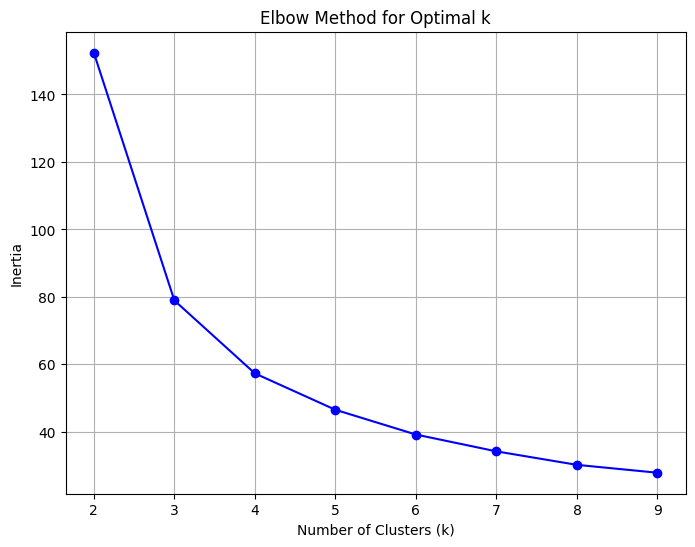

In [39]:
import warnings
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning  # Import ConvergenceWarning
inertia = []  # Initialize an empty list to store inertia values
k_range = range(2,10)  # Define a range of values for k

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Suppress FutureWarning for n_init
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn')

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(df)  # Fit the K-Means model to your dataset
    inertia.append(model.inertia_)  # Append the inertia to the list

# Plot the inertia values
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


<Axes: >

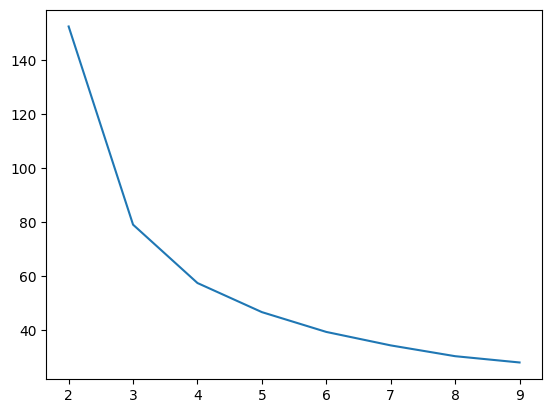

In [40]:
sns.lineplot(x = k_range , y = inertia)

In [42]:
silhoute = list()
k_range = range(2, 10)
for k in k_range:
    Model=KMeans(n_clusters=k)
    Model.fit(df)
    silhoute.append(silhouette_score( df ,   Model.labels_   ))

In [44]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [52]:
model=KMeans(n_clusters=3)

In [55]:
model.fit(df)
df["Clusters"] = model.predict(df)

In [56]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [57]:
df.groupby("Clusters").describe().transpose()

Clusters                     0          1          2
SepalLengthCm count  50.000000  62.000000  38.000000
              mean    5.006000   5.901613   6.850000
              std     0.352490   0.466410   0.494155
              min     4.300000   4.900000   6.100000
              25%     4.800000   5.600000   6.425000
              50%     5.000000   5.900000   6.700000
              75%     5.200000   6.200000   7.200000
              max     5.800000   7.000000   7.900000
SepalWidthCm  count  50.000000  62.000000  38.000000
              mean    3.418000   2.748387   3.073684
              std     0.381024   0.296284   0.290092
              min     2.300000   2.000000   2.500000
              25%     3.125000   2.500000   2.925000
              50%     3.400000   2.800000   3.000000
              75%     3.675000   3.000000   3.200000
              max     4.400000   3.400000   3.800000
PetalLengthCm count  50.000000  62.000000  38.000000
              mean    1.464000   4.393548   5.742105
              std     0.173511   0.508895   0.488590
              min     1.000000   3.000000   4.900000
              25%     1.400000   4.025000   5.425000
              50%     1.500000   4.500000   5.650000
              75%     1.575000   4.800000   6.000000
              max     1.900000   5.100000   6.900000
PetalWidthCm  count  50.000000  62.000000  38.000000
              mean    0.244000   1.433871   2.071053
              std     0.107210   0.297500   0.279872
              min     0.100000   1.000000   1.400000
              25%     0.200000   1.300000   1.825000
              50%     0.200000   1.400000   2.100000
              75%     0.300000   1.575000   2.300000
              max     0.600000   2.400000   2.500000

In [62]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


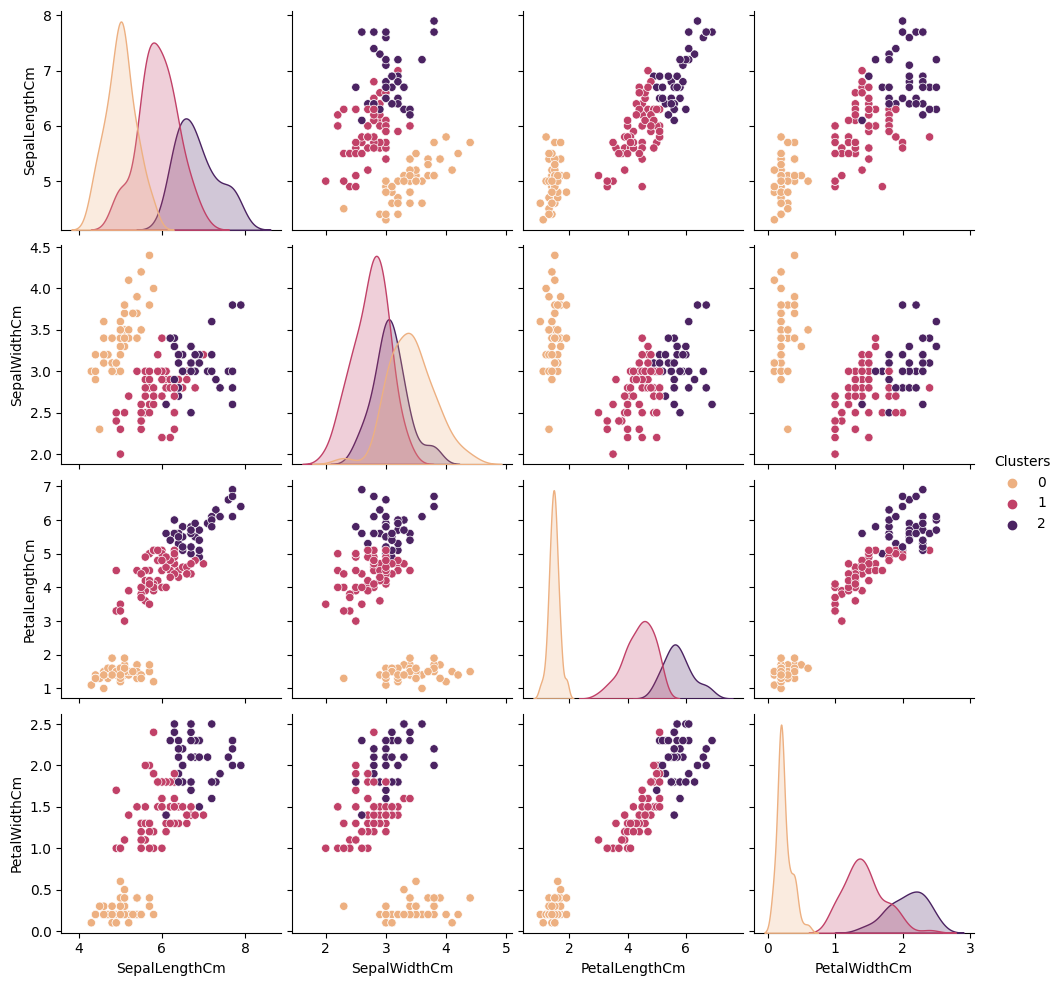

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains your dataset and "Clusters" is a column in df

# Create a pairplot with hue as "Clusters"
sns.pairplot(data=df, hue="Clusters", palette="flare")
plt.show()